In [1]:
from PME import PME1D, PME2D
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

In [2]:
def plotErr(self, axs, label, color):
    for ax in axs:
        ax.set_xlabel("Iteration count")
    axs[0].set_ylabel("PDHG Error")
    axs[1].set_ylabel("Rho Errors")
    axs[0].semilogy(self.iterList, self.pdhgErr, "-", label = label, color = color)
    axs[1].semilogy(self.iterList, self.stErr, "-", label = label, color = color)
    axs[1].semilogy(self.iterList, self.terminalErr, "--", label = label, color = color)
    axs[1].text(
        0.95, 0.95, 
        " — spacetime error\n --- terminal error", 
        transform=axs[1].transAxes, 
        fontsize=10,
        color="red",
        horizontalalignment='right',
        verticalalignment='top',
        multialignment='left',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.5)
    )

# One dimension

## Sample solution

In [6]:
P = PME1D(beta=0.01, nx=32, ny =32, order=2)
P.solve()
P.draw(P.rhoh)

Iteration: 1000 PDHG error: 5.77585387e-08 spacetime error: 4.36677720e-06 terminal error 4.94072115e-06



WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

## Convergence study

In [7]:
nx, ny = 8, 8
beta = 0.01

labels = [r'$8\times 8$', r'$16\times 16$', r'$32\times 32$', r'$64\times64$']
colors = ['r','g','b','m']

### $\alpha = 1.5$

In [8]:
alpha = 1.5

$p=1$

Iteration: 1000 PDHG error: 5.62842439e-09 spacetime error: 2.52471188e-03 terminal error 3.80438433e-03

Iteration: 1000 PDHG error: 6.37998510e-09 spacetime error: 6.04050572e-04 terminal error 9.14476710e-04

Order (ST) =  2.0633775126664484
Order (Terminal) =  2.0566446644437217


Iteration: 1000 PDHG error: 6.57968036e-09 spacetime error: 1.49509016e-04 terminal error 2.26596252e-04

Order (ST) =  2.01443685318531
Order (Terminal) =  2.012822432423617


Iteration: 1000 PDHG error: 6.63046718e-09 spacetime error: 3.73982107e-05 terminal error 5.67107405e-05

Order (ST) =  1.9991913345974646
Order (Terminal) =  1.9984300958290009




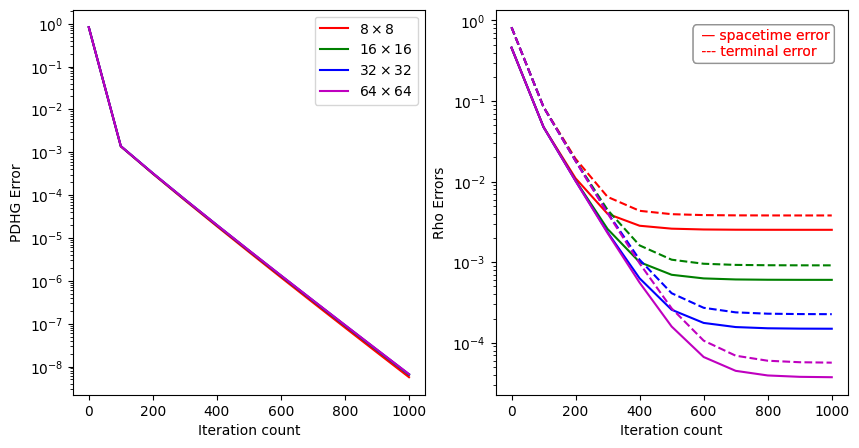

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1000
order = 1
for i in range(4):
    P1 = PME1D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i)
    P1.solve()
    plotErr(P1, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P1.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P1.terminalErr[-1]))
        print("\n")
    err0 = P1.stErr[-1]
    err1 = P1.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=2$

Iteration: 1500 PDHG error: 1.44840584e-10 spacetime error: 2.46270782e-04 terminal error 2.23591167e-04

Iteration: 1500 PDHG error: 4.82394147e-09 spacetime error: 3.22244079e-05 terminal error 2.68270909e-05

Order (ST) =  2.93401972165338
Order (Terminal) =  3.0591006749090575


Iteration: 1500 PDHG error: 7.51011475e-11 spacetime error: 4.07174338e-06 terminal error 3.86789028e-06

Order (ST) =  2.984435305175272
Order (Terminal) =  2.7940718417117867


Iteration: 1500 PDHG error: 9.64039959e-12 spacetime error: 5.10332978e-07 terminal error 4.85811473e-07

Order (ST) =  2.9961358625874563
Order (Terminal) =  2.993078405215004




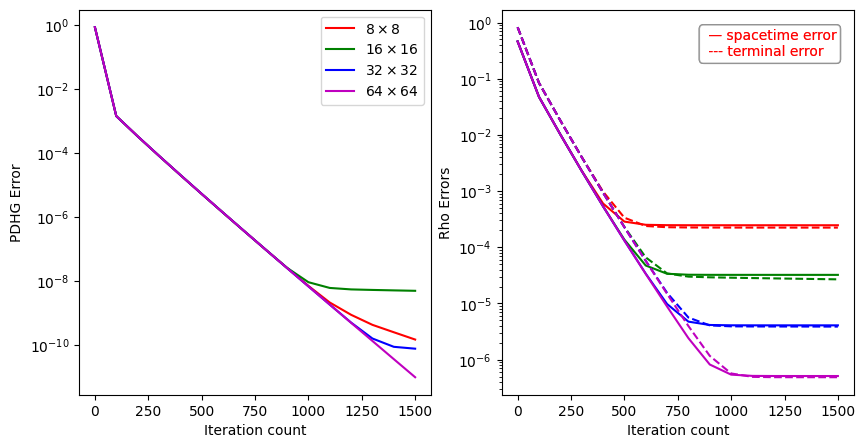

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1500
order = 2
for i in range(4):
    P2 = PME1D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i)
    P2.solve()
    plotErr(P2, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P2.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P2.terminalErr[-1]))
        print("\n")
    err0 = P2.stErr[-1]
    err1 = P2.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Iteration: 1800 PDHG error: 3.76354503e-12 spacetime error: 1.16988724e-05 terminal error 1.12417660e-05

Iteration: 1800 PDHG error: 3.25850458e-13 spacetime error: 7.42051486e-07 terminal error 7.08042632e-07

Order (ST) =  3.9787063761949146
Order (Terminal) =  3.9888886493611544


Iteration: 1800 PDHG error: 2.01283434e-13 spacetime error: 4.65531735e-08 terminal error 4.43326504e-08

Order (ST) =  3.9945678671905482
Order (Terminal) =  3.9973947082951864


Iteration: 1800 PDHG error: 2.00395256e-13 spacetime error: 2.91237094e-09 terminal error 2.77383016e-09

Order (ST) =  3.9986134946488363
Order (Terminal) =  3.998418255184412




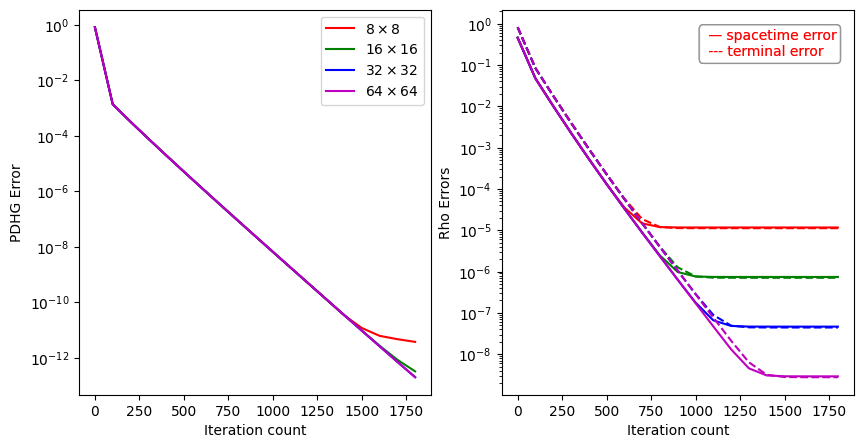

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1800
order = 3
for i in range(4):
    P3 = PME1D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i)
    P3.solve()
    plotErr(P3, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P3.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P3.terminalErr[-1]))
        print("\n")
    err0 = P3.stErr[-1]
    err1 = P3.terminalErr[-1]
    
axs[0].legend()
plt.show()


### $\alpha = 2$

In [ ]:
alpha = 2

$p=1$

Iteration: 1000 PDHG error: 5.62842439e-09 spacetime error: 2.52471188e-03 terminal error 3.80438433e-03

Iteration: 1000 PDHG error: 6.37998510e-09 spacetime error: 6.04050572e-04 terminal error 9.14476710e-04

Order (ST) =  2.0633775126664484
Order (Terminal) =  2.0566446644437217


Iteration: 1000 PDHG error: 6.57968036e-09 spacetime error: 1.49509016e-04 terminal error 2.26596252e-04

Order (ST) =  2.01443685318531
Order (Terminal) =  2.012822432423617


Iteration: 1000 PDHG error: 6.63046718e-09 spacetime error: 3.73982107e-05 terminal error 5.67107405e-05

Order (ST) =  1.9991913345974646
Order (Terminal) =  1.9984300958290009




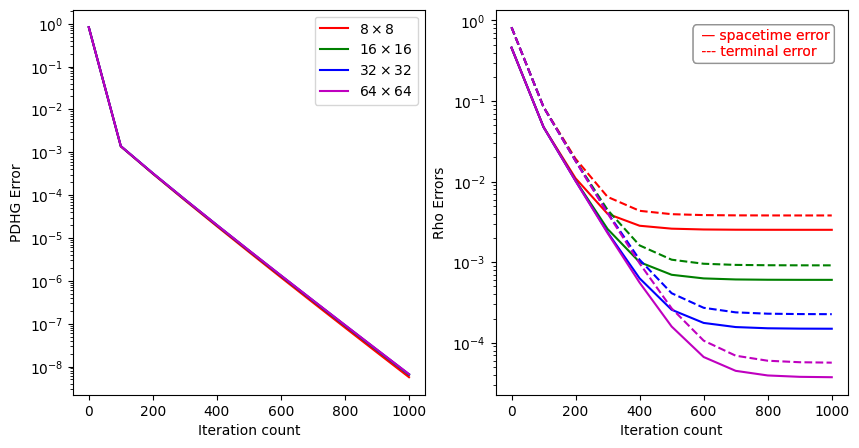

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1000
order = 1
for i in range(4):
    PP1 = PME1D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i)
    PP1.solve()
    plotErr(PP1, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP1.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP1.terminalErr[-1]))
        print("\n")
    err0 = PP1.stErr[-1]
    err1 = PP1.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=2$

Iteration: 1500 PDHG error: 1.44840584e-10 spacetime error: 2.46270782e-04 terminal error 2.23591167e-04

Iteration: 1500 PDHG error: 4.82394147e-09 spacetime error: 3.22244079e-05 terminal error 2.68270909e-05

Order (ST) =  2.9340197216533794
Order (Terminal) =  3.0591006749090575


Iteration: 1500 PDHG error: 7.51011475e-11 spacetime error: 4.07174338e-06 terminal error 3.86789028e-06

Order (ST) =  2.984435305175272
Order (Terminal) =  2.7940718417117867


Iteration: 1500 PDHG error: 9.64039959e-12 spacetime error: 5.10332978e-07 terminal error 4.85811473e-07

Order (ST) =  2.996135862587457
Order (Terminal) =  2.993078405215004




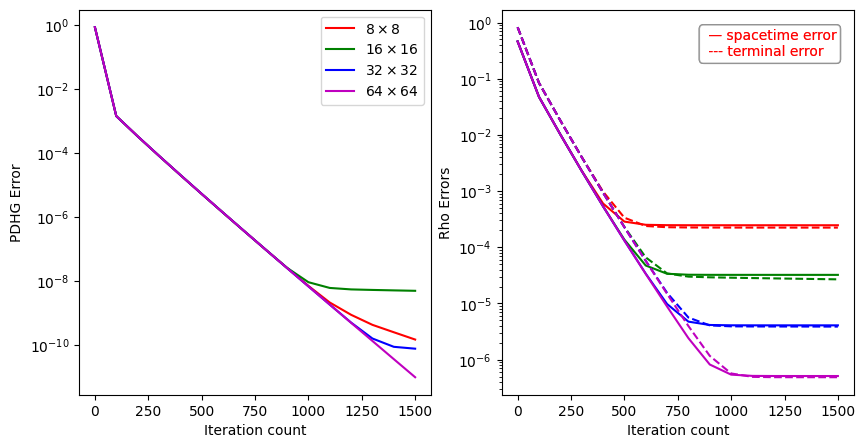

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1500
order = 2
for i in range(4):
    PP2 = PME1D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i)
    PP2.solve()
    plotErr(PP2, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP2.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP2.terminalErr[-1]))
        print("\n")
    err0 = PP2.stErr[-1]
    err1 = PP2.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Iteration: 1800 PDHG error: 3.76354503e-12 spacetime error: 1.16988724e-05 terminal error 1.12417660e-05

Iteration: 1800 PDHG error: 3.25850458e-13 spacetime error: 7.42051486e-07 terminal error 7.08042632e-07

Order (ST) =  3.9787063761949146
Order (Terminal) =  3.9888886493611544


Iteration: 1800 PDHG error: 2.01283434e-13 spacetime error: 4.65531735e-08 terminal error 4.43326504e-08

Order (ST) =  3.9945678671905482
Order (Terminal) =  3.997394708295186


Iteration: 1800 PDHG error: 2.00395256e-13 spacetime error: 2.91237094e-09 terminal error 2.77383016e-09

Order (ST) =  3.9986134946488363
Order (Terminal) =  3.9984182551844127




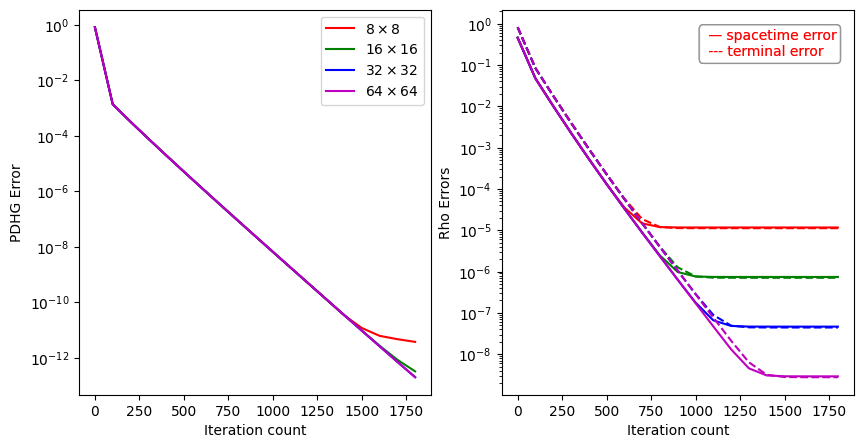

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1800
order = 3
for i in range(4):
    PP3 = PME1D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i)
    PP3.solve()
    plotErr(PP3, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP3.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP3.terminalErr[-1]))
        print("\n")
    err0 = PP3.stErr[-1]
    err1 = PP3.terminalErr[-1]
    
axs[0].legend()
plt.show()


# Two dimensions

## Sample solution

In [3]:
P = PME2D(beta = 0.005, nx = 8, ny = 8, nz = 8, order=1)
P.solve()


Iteration: 1000 PDHG error: 7.01082582e-06 spacetime error: 2.69633818e-03 terminal error 3.82958593e-03



## Convergence study

In [3]:
nx, ny, nz = 4, 4, 4
beta = 0.005

colors = ['darkorange','r','g']
labels = [r'$4\times 4 \times 4$',r'$8\times 8 \times 8$', r'$16\times 16 \times 16$']

### $\alpha = 1.5$

In [4]:
alpha = 1.5

$p=1$

Iteration: 1500 PDHG error: 4.06173669e-08 spacetime error: 8.64301640e-03 terminal error 1.26649494e-02

Iteration: 1500 PDHG error: 7.12700108e-08 spacetime error: 1.79069288e-03 terminal error 2.70223334e-03

Order (ST) =  2.2710169774457154
Order (Terminal) =  2.2286171467017515


Iteration: 1500 PDHG error: 8.27750043e-08 spacetime error: 4.30505566e-04 terminal error 6.53038434e-04

Order (ST) =  2.056414125185615
Order (Terminal) =  2.0489124493500372




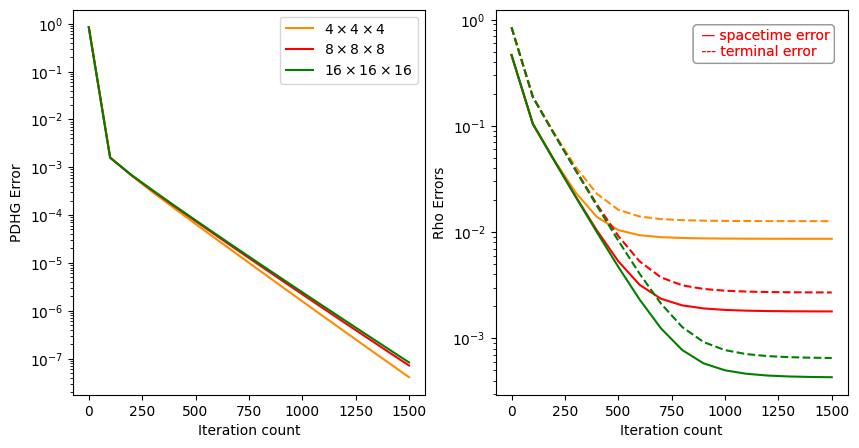

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1500
order = 1
for i in range(3):
    P21 = PME2D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    P21.solve()
    plotErr(P21, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P21.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P21.terminalErr[-1]))
        print("\n")
    err0 = P21.stErr[-1]
    err1 = P21.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=2$

Iteration: 2000 PDHG error: 2.78973511e-09 spacetime error: 1.44224882e-03 terminal error 1.52800893e-03

Iteration: 2000 PDHG error: 3.19036919e-09 spacetime error: 2.44479649e-04 terminal error 2.33811348e-04

Order (ST) =  2.5605338018916908
Order (Terminal) =  2.7082361175153156


Iteration: 2000 PDHG error: 4.62851391e-09 spacetime error: 3.22023799e-05 terminal error 2.79700149e-05

Order (ST) =  2.9244751591666884
Order (Terminal) =  3.063392025713168




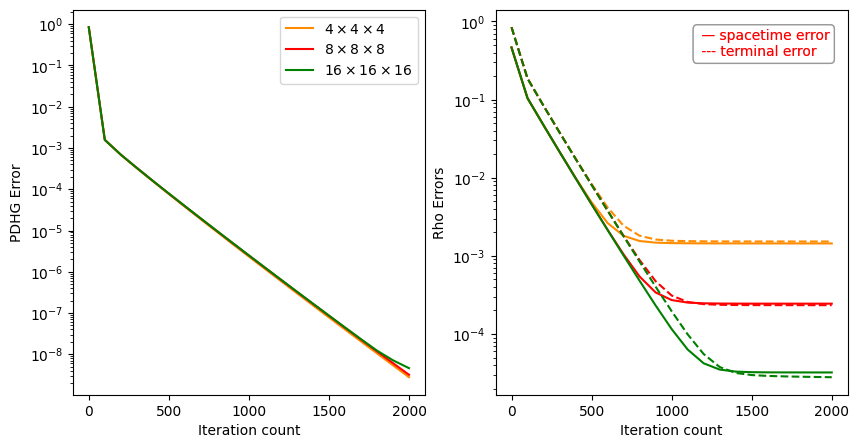

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 2000
order = 2
for i in range(3):
    P22 = PME2D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    P22.solve()
    plotErr(P22, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P22.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P22.terminalErr[-1]))
        print("\n")
    err0 = P22.stErr[-1]
    err1 = P22.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Iteration: 2000 PDHG error: 3.13629223e-09 spacetime error: 1.69624109e-04 terminal error 1.68035695e-04

Iteration: 2000 PDHG error: 3.20132965e-09 spacetime error: 1.14993545e-05 terminal error 1.11516258e-05

Order (ST) =  3.882716455673224
Order (Terminal) =  3.9134417728522735


Iteration: 2000 PDHG error: 3.04968395e-09 spacetime error: 7.47199870e-07 terminal error 7.30736118e-07

Order (ST) =  3.9439148626329694
Order (Terminal) =  3.9317597251335807




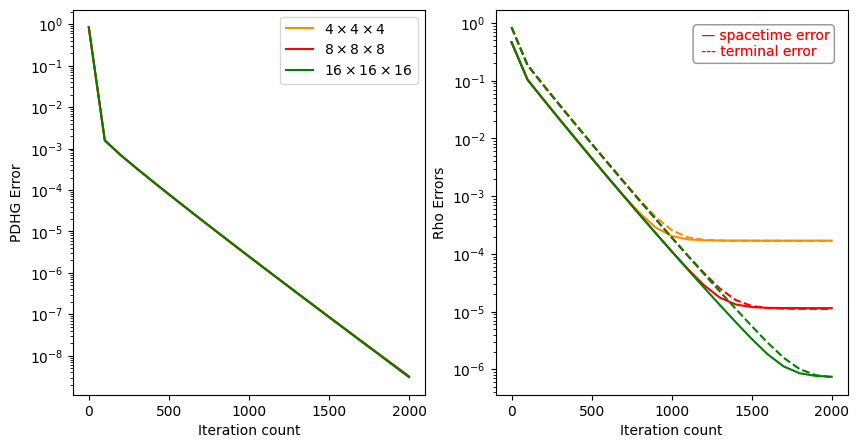

In [5]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 2000
order = 3
for i in range(3):
    P23 = PME2D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    P23.solve()
    plotErr(P23, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P23.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P23.terminalErr[-1]))
        print("\n")
    err0 = P23.stErr[-1]
    err1 = P23.terminalErr[-1]
    
axs[0].legend()
plt.show()


### $\alpha = 2$

In [3]:
alpha = 2

$p=1$

Iteration: 1800 PDHG error: 4.11124540e-08 spacetime error: 1.17040527e-02 terminal error 1.55131593e-02

Iteration: 1800 PDHG error: 6.65314767e-08 spacetime error: 2.54578422e-03 terminal error 3.51371004e-03

Order (ST) =  2.2008261177660833
Order (Terminal) =  2.1424254796296585


Iteration: 1800 PDHG error: 7.55460136e-08 spacetime error: 6.15698799e-04 terminal error 8.56221413e-04

Order (ST) =  2.0478134853688212
Order (Terminal) =  2.036939319810523




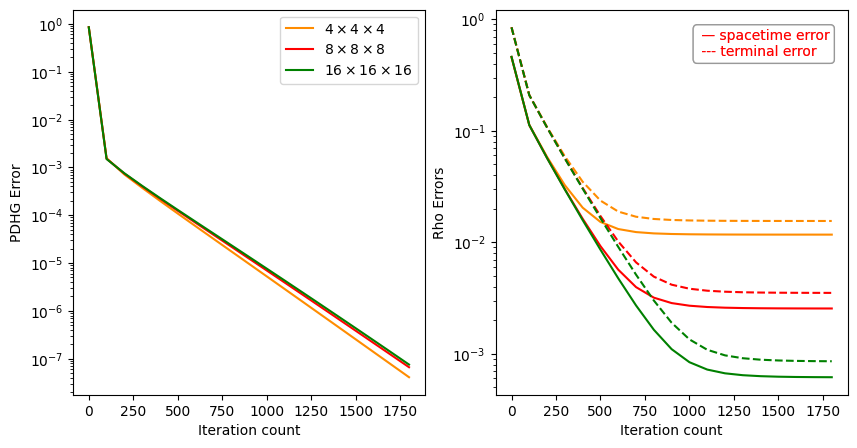

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1800
order = 1
for i in range(3):
    PP21 = PME2D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    PP21.solve()
    plotErr(PP21, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP21.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP21.terminalErr[-1]))
        print("\n")
    err0 = PP21.stErr[-1]
    err1 = PP21.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=2$

Iteration: 2500 PDHG error: 1.26470467e-09 spacetime error: 1.52349268e-03 terminal error 1.56071684e-03

Iteration: 2500 PDHG error: 2.03929729e-09 spacetime error: 2.45863894e-04 terminal error 2.29071045e-04

Order (ST) =  2.63145077643762
Order (Terminal) =  2.7683417927218863


Iteration: 2500 PDHG error: 4.60854643e-09 spacetime error: 3.22169246e-05 terminal error 2.66634319e-05

Order (ST) =  2.931969198967665
Order (Terminal) =  3.102860720217635




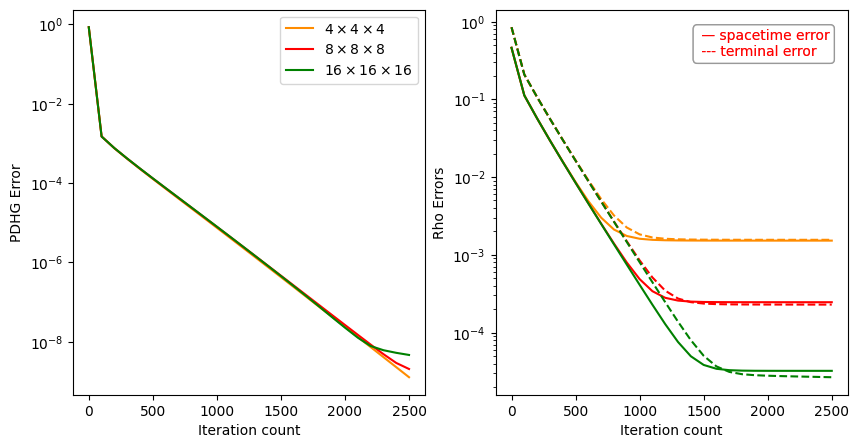

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 2500
order = 2
for i in range(3):
    PP22 = PME2D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    PP22.solve()
    plotErr(PP22, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP22.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP22.terminalErr[-1]))
        print("\n")
    err0 = PP22.stErr[-1]
    err1 = PP22.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Iteration: 3200 PDHG error: 2.32220909e-11 spacetime error: 1.73646558e-04 terminal error 1.70156839e-04

Iteration: 3200 PDHG error: 2.60691468e-11 spacetime error: 1.15969891e-05 terminal error 1.11456957e-05

Order (ST) =  3.9043316239502848
Order (Terminal) =  3.9323065577638725


Iteration: 3200 PDHG error: 1.23232047e-09 spacetime error: 7.76701585e-07 terminal error 7.26783508e-07

Order (ST) =  3.9002460651036635
Order (Terminal) =  3.9388171802571885




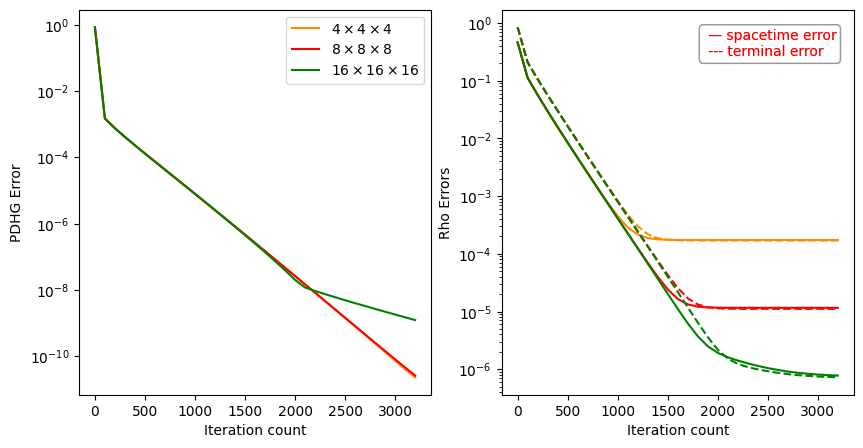

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 3200
order = 3
for i in range(3):
    PP23 = PME2D(order = order, maxIter = nIter + 1, alpha = alpha, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    PP23.solve()
    plotErr(PP23, axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP23.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP23.terminalErr[-1]))
        print("\n")
    err0 = PP23.stErr[-1]
    err1 = PP23.terminalErr[-1]
    
axs[0].legend()
plt.show()
